# Week 8 - Logistic Regression and Clustering
### Data Science Bootcamp Fall 2024


---





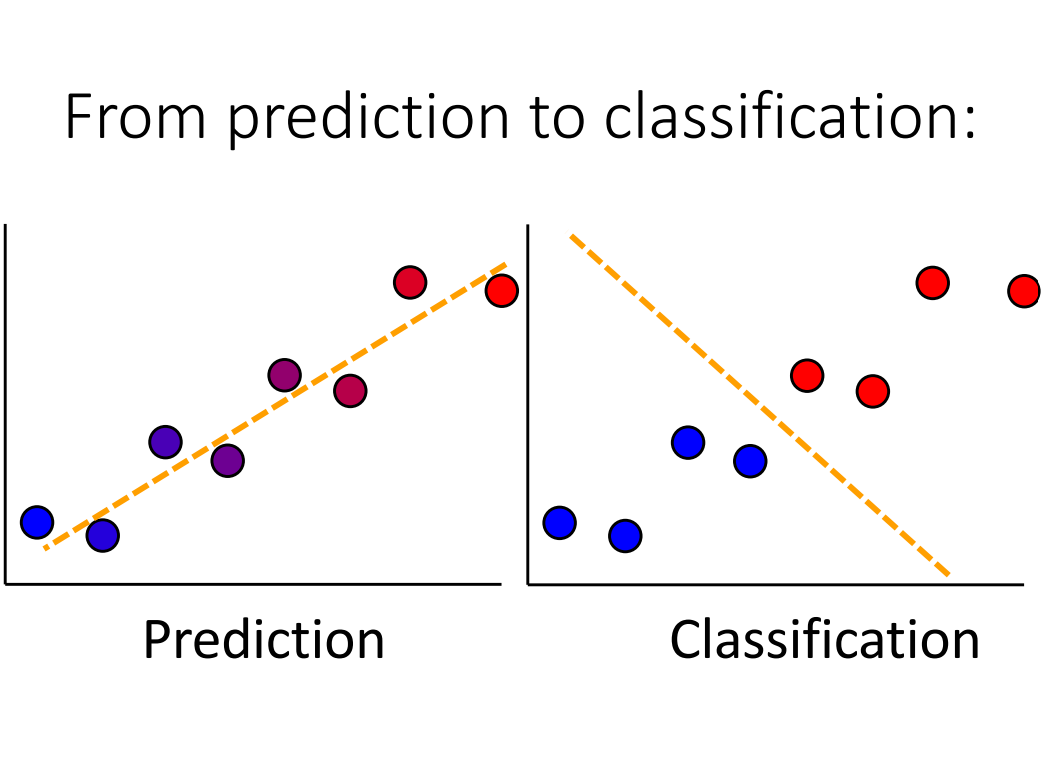

## Classification:

Suppose we have a series of data points {(𝐱𝟏
, 𝑦1
), (𝐱𝟐
, 𝑦2
), … , (𝐱𝐧, 𝑦𝑛)} and there is some (unknown)
relationship between 𝐱𝐢
and 𝑦𝑖
.

• Classification: The output variable 𝑦 is constrained to be ∈ 1, 2, ⋯ , 𝐾

• Binary classification: The output variable 𝑦 is constrained to be ∈ 0, 1

## Recap


Recall the simple linear regression equation is $y = \beta_0 + \beta_1x$

$\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the `x` predictor.


```
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.intercept_, linear_reg.coef_)
```




**Coefficient interpretation:** A 1-unit increase in `x` is associated with a `β1`-unit change in `y`.

**Intercept interpretation:** When `x = 0`, the estimated value of `y` is $\beta_0$


<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, `but what about when we want to predict membership in a class or category?`

## Toy Example

` You want to predict if a candidate will get hired by a company or not `

Things you might consider when making this decision -
1. `GPA`
2. `Experience`
3. `Portfolio`
4. `Skills`
5. `Education` ...



## Lets plot GPA against Hired?

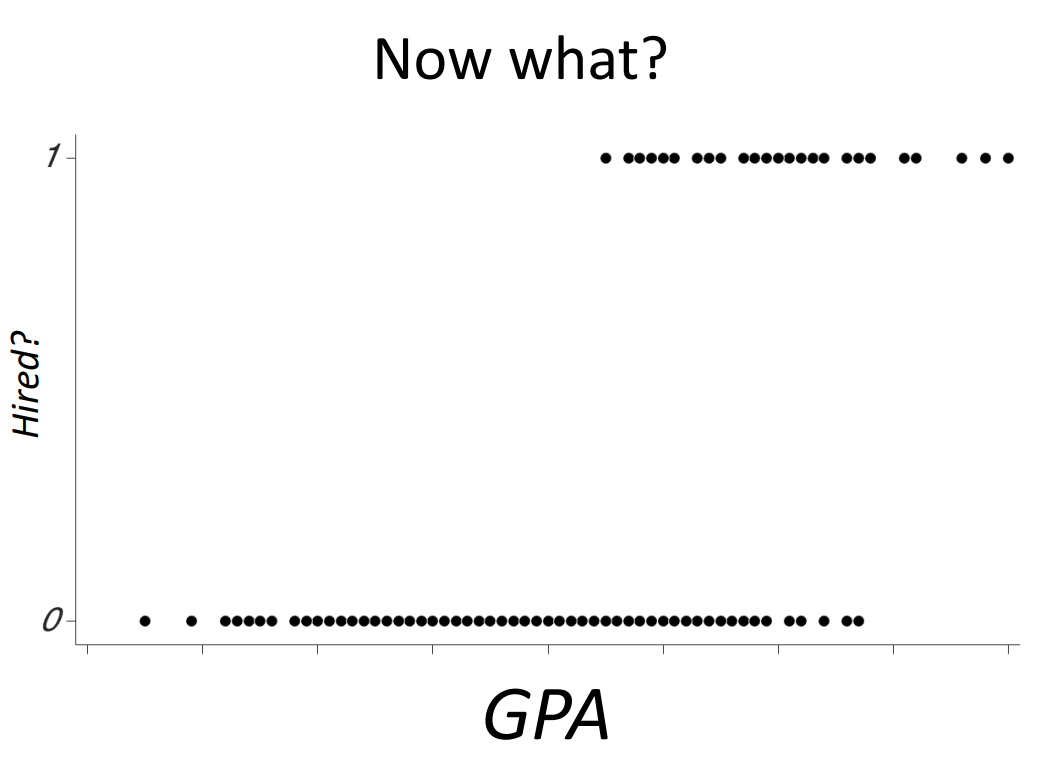

## Can we apply a Linear Regression model?

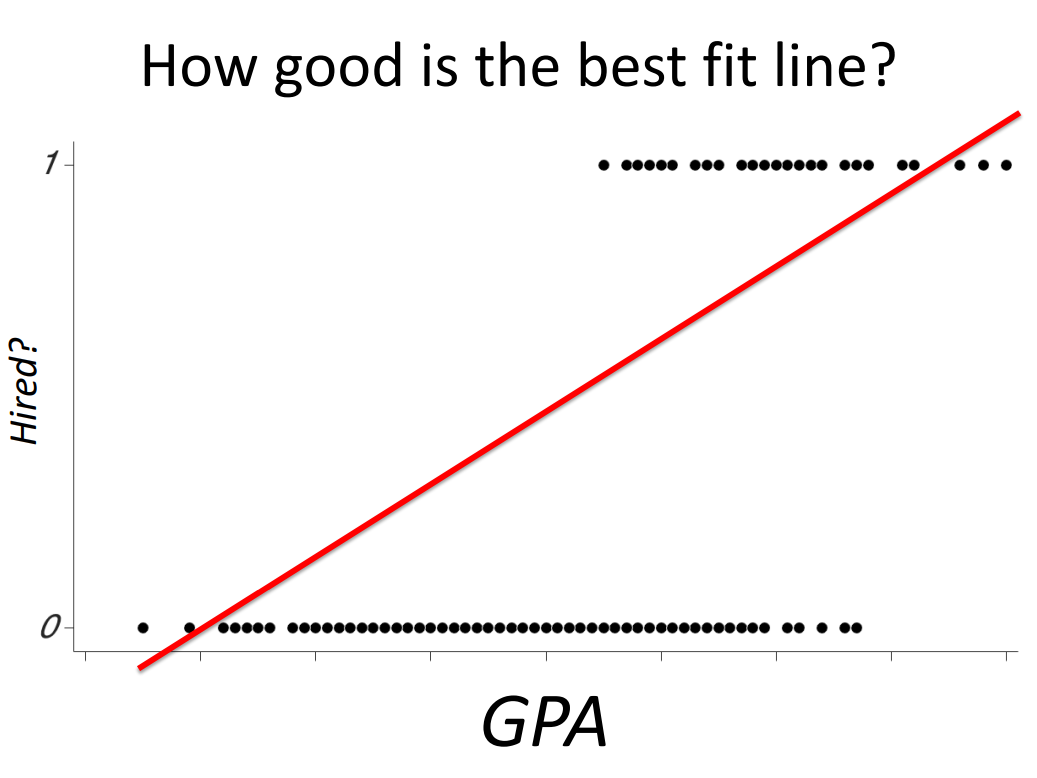

# `Just because we can, doesn't mean we should!`

Issues with Linear Regression in this case -
1. It assumes that the data is distributed normally. Here, the outcomes are either `0 or 1 (binary)`. Definitely, not normal!

2. Effect of unit change is assumed to be constant

3. Linear Regressions is unbounded


Hence, we need something else in this case.




---

## Logistic Regression

* A `nonlinear model` that links the predictor and the outcomes
* We model the `odds` of an outcome happening



> odds = $\frac{p}{1-p}$

eg. if p = 0.5  -> odds = 1:1

eg. if p = 0.75 -> odds = 3:1


## How does Logistic Regression work?

Linear regression: Continuous response is modeled as a linear combination of the features.

$$z = \beta_0 + \beta_1x$$

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the `logit function`.

Probability is sometimes written as π.

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1



`We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?`


- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems.
- Multinomial logistic regression, on the other hand, can solve this as a single problem, but how this works is beyond the scope of this lesson. Hint: use softmax function.

## Lets fit a Logistic Regression model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [3]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [4]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11482147]]), array([-6.00880515]))

Text(0, 0.5, 'household')

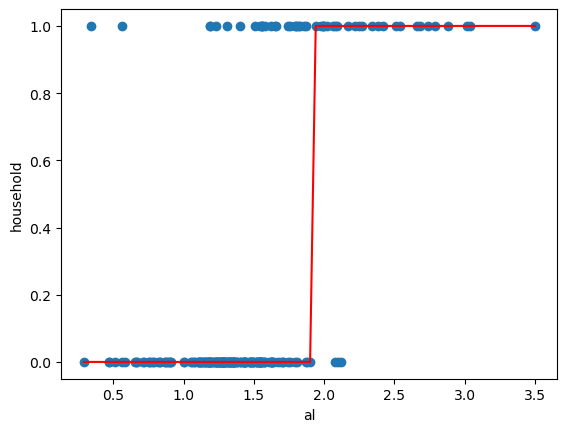

In [6]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [7]:
logreg.predict_proba(X)[:15]

array([[0.99397328, 0.00602672],
       [0.99296478, 0.00703522],
       [0.98948976, 0.01051024],
       [0.98948976, 0.01051024],
       [0.98811176, 0.01188824],
       [0.98613609, 0.01386391],
       [0.98613609, 0.01386391],
       [0.98525808, 0.01474192],
       [0.98173207, 0.01826793],
       [0.98116498, 0.01883502],
       [0.98058065, 0.01941935],
       [0.97806048, 0.02193952],
       [0.97738205, 0.02261795],
       [0.97522152, 0.02477848],
       [0.97522152, 0.02477848]])

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [8]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [9]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006027
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007035
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010510
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010510
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011888
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935929
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950822
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967641
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969535


Text(0, 0.5, 'household')

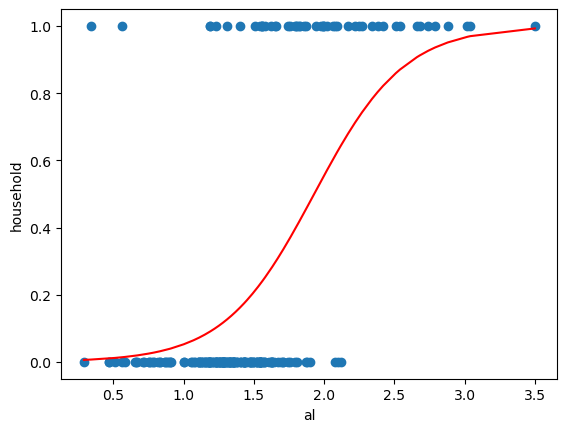

In [10]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

## Interpreting the coeffecients

**Interpretation:** A 1-unit increase in `al` is associated with a 2.01-unit increase in the log odds of `household`.

Positive coefficients increase the log odds of the response (and thus increase the probability), and negative coefficients decrease the log odds of the response (and thus decrease the probability).

## How good are our predictions?

In [11]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]])

In [12]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy
#(TN+TP)/(TN+TP+FN+FP)

0.8691588785046729

In [13]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision
#(TP)/(TN+TP)


0.896551724137931

In [14]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall
#(TP)/(TP+FN)


0.5098039215686274

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [16]:
precision_score(y_true=y, y_pred=pred)

0.896551724137931

In [17]:
recall_score(y,pred)

0.5098039215686274

### The Accuracy Paradox

Accuracy is a very intuitive metric — it's a lot like an exam score where you get total correct/total attempted. However, accuracy is often a poor metric in application. There are many reasons for this:
- Imbalanced problems with 95% positives in the baseline will have 95% accuracy even with no predictive power.
  - This is the paradox; pursuing accuracy often means predicting the most common class rather than doing the most useful work.
- Applications often have uneven penalties and rewards for true positives and false positives.
- Ranking predictions in the correct order be more important than getting them correct.
- In many case we need to know the exact probability of a positives and negatives.
  - To calculate an expected return.
  - To triage observations that are borderline positive.

**Some of the most useful metrics for addressing these problems are:**
    
- **Classification accuracy/error**
  - Classification accuracy is the percentage of correct predictions (higher is better).
  - Classification error is the percentage of incorrect predictions (lower is better).
  - Easiest classification metric to understand.
- **Confusion matrix**
  - Gives you a better understanding of how your classifier is performing.
  - Allows you to calculate sensitivity, specificity, and many other metrics that might match your business objective better than accuracy.
  - Precision and recall are good for balancing misclassification costs.



The good news is that these are readily available in Python and R, and are usually easy to calculate once you know about them.

## How do we know what threshold to set?

- ROC Curve Construction: For each threshold value, calculate the TPR and FPR.
Plot these values on a graph with TPR on the y-axis and FPR on the x-axis. This generates the ROC curve.

- Interpretation: The ROC curve provides a visual representation of the trade-off between sensitivity (TPR) and specificity (1 - FPR) for different threshold values. A curve that is closer to the top-left corner indicates better performance, as it represents higher sensitivity and lower false positive rate across various threshold settings.

- Area Under the Curve (AUC): AUC is calculated by measuring the area under the ROC curve. AUC provides a single scalar value summarizing the model's performance. Higher AUC values indicate better discrimination ability of the model across all threshold settings, with 1 being perfect and 0.5 indicating no discrimination ability (random guessing).

In summary, the ROC curve helps in evaluating the performance of a classification model by illustrating its ability to discriminate between positive and negative classes across different threshold settings.

Practice Questions:
1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

2. Do the same analysis for other columns

3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

4. Plot ROC Curves for each model

---
---

# Clustering

(Unsupervised Learning)

---
---

### Helpful uses for clustering:
   - Find items with similar behavior (users, products, voters, etc)
   - Market segmentation
   - Understand complex systems
   - Discover meaningful categories for your data
   - Reduce the number of classes by grouping (e.g. bourbons, scotches -> whiskeys)
   - Reduce the dimensions of your problem
   - Pre-processing! Create labels for supervised learning

## K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster.
5. Repeat steps 3-4 until your centroids converge.

# Metrics for assessing your clusters

**Inertia** -- sum of squared errors for each cluster
- low inertia = dense clusters
- Ranges from -inf to +inf

**Silhouette Score** -- measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated


### Inertia

sum of squared errors for each cluster

- low inertia = dense cluster

$$\sum_{j=0}^{n} (x_j - \mu_i)^2$$

where $\mu_i$ is a cluster centroid. (K-means explicitly tries to minimize this.)

`.inertia_` is an attribute of sklearn's kmeans models.


### Silhouette Score

measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated

The definition is a little involved$^*$, but intuitively the score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.

We can calculate it in sklearn with `metrics.silhouette_score(X_scaled, labels, metric='euclidean')`.

* <https://en.wikipedia.org/wiki/Silhouette_(clustering)>


### Demo

In [18]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [19]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

Next, since each of our features have different units and ranges, let's do some preprocessing:

In [21]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [22]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Now that we've formatted our data and understand its structures, we can finally go ahead and cluster.

We're going to set k = 2, given the pattern we were seeing above in our graphs.

In [23]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [24]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [25]:
print(labels,centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] [[0.545      0.36333333 0.6620339  0.65666667]
 [0.19611111 0.59083333 0.07864407 0.06      ]]


In [26]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.6294675561906644

How to choose Value of k?

In [27]:
score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))



In [28]:
plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

In [29]:
inertia_score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  inertia_score.append(inertia)

In [30]:
plt.scatter(list(range(2,20)),inertia_score)
plt.xlabel('k')
plt.ylabel('Inertia')

Text(0, 0.5, 'Inertia')

The curve we obtain is called the Elbow curve. We want to stop changing the value of k when the distance between two k values does not change much.


...and we're done! You've completed your first clustering analysis.

Let's see how it looks. First, let's put the labels columns into our dataframe

In [31]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,13
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,12


Let's plot each cluster in a different color. Seaborn has a 'hue' parameter we can use for this.

In [33]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

In [34]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

### Practice questions:
1. Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?


2. Repeat the following exercise for food nutrients dataset


## Further reading

- The [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html) has a great summary of many other clustering algorithms.
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) is one popular alternative.
- This [PyData talk](https://www.youtube.com/watch?v=Mf6MqIS2ql4) is good overview of clustering, different algorithms, and how to think about the quality of your clusters.

# Thank you!

In [35]:
# Take Home Assessment


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd


y = (glass['Type'] == 1).astype(int).values


features = [c for c in glass.columns if c != 'Type']


thresholds = [0.2, 0.4, 0.5, 0.6, 0.8]


records = []

for feat in features:

    X = glass[[feat]].values
    

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    

    scaler = StandardScaler().fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    

    clf = LogisticRegression(max_iter=1000).fit(X_train_s, y_train)
    probs = clf.predict_proba(X_test_s)[:, 1]
    

    for t in thresholds:
        preds = (probs >= t).astype(int)
        records.append({
            'Feature': feat,
            'Threshold': t,
            'Accuracy': accuracy_score(y_test, preds),
            'Precision': precision_score(y_test, preds, zero_division=0),
            'Recall': recall_score(y_test, preds, zero_division=0)
        })


threshold_df = pd.DataFrame(records)
threshold_df = threshold_df.sort_values(['Feature', 'Threshold']).reset_index(drop=True)
display(threshold_df)


,Feature,Threshold,Accuracy,Precision,Recall
0,Al,0.2,0.584615,0.425532,1.00
1,Al,0.4,0.769231,0.666667,0.50
2,Al,0.5,0.676923,0.444444,0.20
3,Al,0.6,0.661538,0.333333,0.10
4,Al,0.8,0.692308,0.000000,0.00
5,Ba,0.2,0.430769,0.345455,0.95
6,Ba,0.4,0.692308,0.000000,0.00
7,Ba,0.5,0.692308,0.000000,0.00
8,Ba,0.6,0.692308,0.000000,0.00
9,Ba,0.8,0.692308,0.000000,0.00


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

glass = pd.read_csv('glass.csv')
X = glass.drop(columns=['Type'])
y = glass['Type']

# 2. Split numeric vs. categorical
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

# 3. Preprocessor
preprocessor = ColumnTransformer([
    ('nums', StandardScaler(),              num_cols),
    ('cats', OneHotEncoder(drop='first',    sparse_output=False), cat_cols)
])

# 4. Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf',  LogisticRegression(max_iter=1000, multi_class='ovr'))
])

# 5. Train/test & fit
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
pipeline.fit(X_tr, y_tr)

# 6. Evaluate
print(classification_report(y_te, pipeline.predict(X_te)))

              precision    recall  f1-score   support

           1       0.66      0.90      0.76        21
           2       0.75      0.65      0.70        23
           3       0.00      0.00      0.00         5
           5       1.00      0.75      0.86         4
           6       0.67      0.67      0.67         3
           7       1.00      1.00      1.00         9

    accuracy                           0.74        65
   macro avg       0.68      0.66      0.66        65
weighted avg       0.71      0.74      0.71        65



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


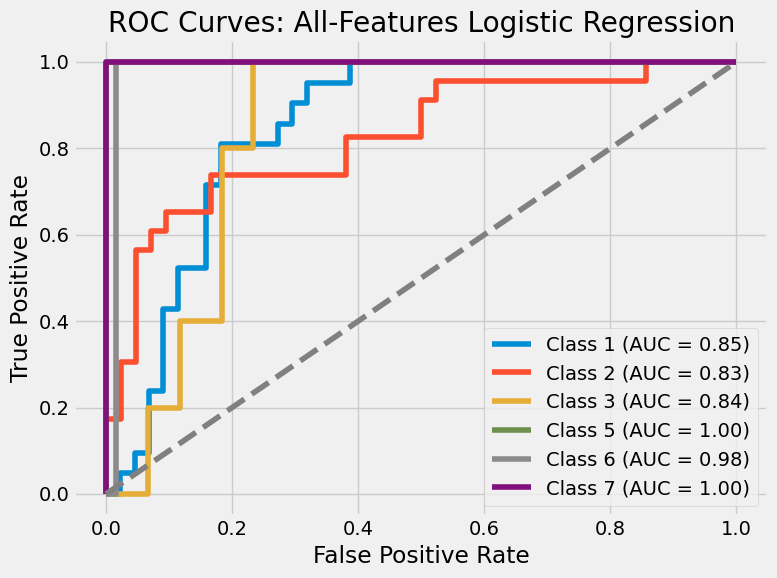

In [48]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

X = glass.drop(columns=['Type'])
y = glass['Type']

# 2. Split into train/test (so we have fresh X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 3. Re-fit the pipeline (if not already fitted in this session)
pipeline.fit(X_train, y_train)

# 4. Binarize the test labels (one-vs-rest)
classes = pipeline.named_steps['clf'].classes_
y_test_bin = label_binarize(y_test, classes=classes)

# 5. Get predicted probabilities for each class
y_score = pipeline.predict_proba(X_test)

# 6. Compute ROC and AUC for each class and plot
plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {roc_auc:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], '--', color='gray')

plt.title('ROC Curves: All-Features Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
#2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_curve, auc
)

# 1. Load data
iris = pd.read_csv('iris.csv')
X = iris.drop(columns=['Name']).values
y = iris['Name'].values
classes = np.unique(y)

# 2. Train/test split + scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

# 3. Fit one-vs-rest Logistic Regression
clf = LogisticRegression(max_iter=1000).fit(X_train_s, y_train)

# 4. Threshold analysis
thresholds = [0.3, 0.5, 0.7]
records = []
probs = clf.predict_proba(X_test_s)
for idx, cls in enumerate(clf.classes_):
    y_true_bin = (y_test == cls).astype(int)
    for t in thresholds:
        preds = (probs[:, idx] >= t).astype(int)
        records.append({
            'Class': cls,
            'Threshold': t,
            'Accuracy': accuracy_score(y_true_bin, preds),
            'Precision': precision_score(y_true_bin, preds, zero_division=0),
            'Recall': recall_score(y_true_bin, preds, zero_division=0)
        })

threshold_df = pd.DataFrame(records)
print("Threshold Metrics:\n", threshold_df)

# 5. ROC & AUC per class
roc_records = []
for idx, cls in enumerate(clf.classes_):
    fpr, tpr, _ = roc_curve((y_test == cls).astype(int), probs[:, idx])
    roc_records.append({
        'Class': cls,
        'AUC': auc(fpr, tpr)
    })

roc_df = pd.DataFrame(roc_records)
print("\nROC AUC Scores:\n", roc_df)


Threshold Metrics:
              Class  Threshold  Accuracy  Precision    Recall
0      Iris-setosa        0.3  1.000000   1.000000  1.000000
1      Iris-setosa        0.5  1.000000   1.000000  1.000000
2      Iris-setosa        0.7  1.000000   1.000000  1.000000
3  Iris-versicolor        0.3  0.888889   0.750000  1.000000
4  Iris-versicolor        0.5  0.911111   0.823529  0.933333
5  Iris-versicolor        0.7  0.933333   1.000000  0.800000
6   Iris-virginica        0.3  0.955556   0.882353  1.000000
7   Iris-virginica        0.5  0.911111   0.923077  0.800000
8   Iris-virginica        0.7  0.888889   1.000000  0.666667

ROC AUC Scores:
              Class       AUC
0      Iris-setosa  1.000000
1  Iris-versicolor  0.993333
2   Iris-virginica  0.993333


In [ ]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 1. Load & prepare
iris = pd.read_csv('iris.csv')
X_raw = iris.drop(columns=['Name']).values
X_scaled = StandardScaler().fit_transform(X_raw)

# 2. Evaluate for k = 2…10
results = []
for k in range(2, 11):
    # raw
    km_r = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_raw)
    sil_r = silhouette_score(X_raw, km_r.labels_)
    # scaled
    km_s = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    sil_s = silhouette_score(X_scaled, km_s.labels_)
    results.append({
        'k': k,
        'inertia_raw': km_r.inertia_,
        'silhouette_raw': sil_r,
        'inertia_scaled': km_s.inertia_,
        'silhouette_scaled': sil_s
    })

cluster_df = pd.DataFrame(results).set_index('k')
print("Clustering Metrics (Iris):\n", cluster_df)

best_k = cluster_df['silhouette_scaled'].idxmax()
print(f"\nBest k by silhouette (scaled): {best_k}")


Clustering Metrics (Iris):
     inertia_raw  silhouette_raw  inertia_scaled  silhouette_scaled
k                                                                 
2    152.368706        0.680814      223.732006           0.580184
3     78.940841        0.552592      140.965817           0.458972
4     57.317873        0.497826      114.617886           0.385285
5     46.535582        0.488518       91.295445           0.347265
6     38.930963        0.368206       81.756582           0.340650
7     34.360209        0.354845       71.319821           0.328832
8     30.023416        0.352109       62.619695           0.341266
9     28.145502        0.343402       55.261841           0.342722
10    25.951544        0.318598       50.623169           0.340376

Best k by silhouette (scaled): 2


1) How do inertia and silhouette scores change as k varies?

Inertia always decreases (or stays the same) as you increase k – more clusters mean each point is, on average, closer to its centroid.

Silhouette score typically peaks at a small k (for Iris it’s highest at k=2) and then gradually declines. That peak indicates the clustering best balances tight, well-separated clusters.

2) What if you don’t scale your features?

Clustering on unscaled data lets large-range features dominate the Euclidean distances, often producing skewed clusters.

You’ll usually see higher inertia (because one feature’s scale blows out the within-cluster sum of squares) and lower silhouette (clusters align more with that one dominant feature rather than the true structure).

3) Is there a “right” k? Why or why not?

There’s no single mathematically “correct” k.

The elbow in the inertia plot and the maximum in the silhouette curve are useful guides, but you should also consider:

Interpretability (do the clusters make sense in your domain?)

Downstream goals (e.g. if you need 3 customer segments for marketing, you might choose k=3 even if silhouette peaks at 2).

Ultimately, choosing k is a mix of metric-based heuristics and real-world rationale.